## **Linear Regression with Python Scikit Learn**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
scores=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploring the Data**

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

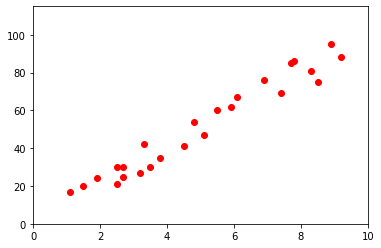

In [ ]:
plt.plot(scores['Hours'],scores['Scores'], 'ro')
plt.axis([0,10,0,115])
plt.show()

**Preparing the data**

In [ ]:
X = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=14) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete......")

Training complete......


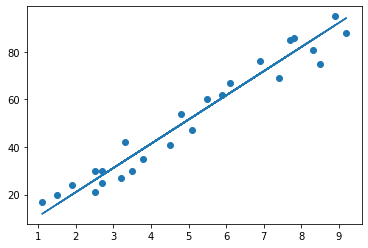

In [ ]:
line = reg.coef_*X+reg.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[8.5]
 [5.1]
 [1.9]
 [8.9]
 [1.1]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,75,87.153130
1,47,52.568902
2,24,20.019039
3,95,91.221863
4,17,11.881574


## Prediction

In [ ]:
hours = [[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.78200381186842


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
reg.score(X_train, y_train)

0.9531798874119468

In [ ]:
reg.score(X_test,y_test)

0.9467192864357015

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.119911056403737
